In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading the csv file starting from row 4 (euro vs uk)

In [98]:
df_gbp_euro = pd.read_csv('data_uk_2.csv', skiprows=4)
df_gbp_euro.dropna(inplace=True)

In [99]:
df_gbp_euro

,Period\Unit:,[UK pound sterling ]
2023-09-01,0.85538,Normal value (A)
2023-08-31,0.85718,Normal value (A)
2023-08-30,0.85920,Normal value (A)
2023-08-29,0.85860,Normal value (A)
2023-08-28,0.85815,Normal value (A)
...,...,...
1999-01-08,0.70940,Normal value (A)
1999-01-07,0.70585,Normal value (A)
1999-01-06,0.70760,Normal value (A)
1999-01-05,0.71220,Normal value (A)


- renaming the column 'Period\\Unit' to 'Time'
- Column 'Time' has unclean data, places where there are hyphens instead of numbers
- I will take the column 'Period\Unit', I will assign it to a variable, change the hyphens to NaNs, reassign the new adjusted column to the original dataframe
- clean - remove records that have NaN values
- add a new column called 'date' that contains the index values of the dataframe (in our case, the index column had the dates)
- creating a plot of the data in the 'df_uk_euro' that has 'date' as the x-axis and 'Period\Unit' as the y-axis
- observe the UK currency against the euro

In [100]:
df_gbp_euro.rename(columns={'Period\\Unit:': 'GBP'}, inplace=True)


<Axes: xlabel='date'>

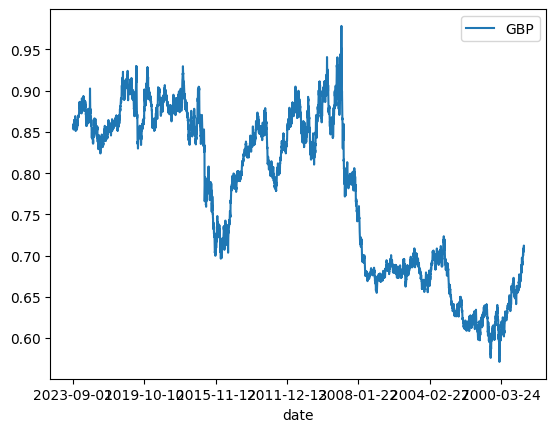

In [102]:
dat = df_gbp_euro['GBP'].replace('-', float('nan')).astype(float)
df_gbp_euro['GBP'] = dat
df_gbp_euro.dropna(inplace=True)
df_gbp_euro['date'] = df_uk_euro.index
df_gbp_euro.plot(x='date', y=['GBP'])

Calculating the highest and the lowest depriciation against euro (the highest and the lowest historical value in the dataset)

Max val of 0.979 at date 2008-12-29
Min val of 0.571 at date 2000-05-03


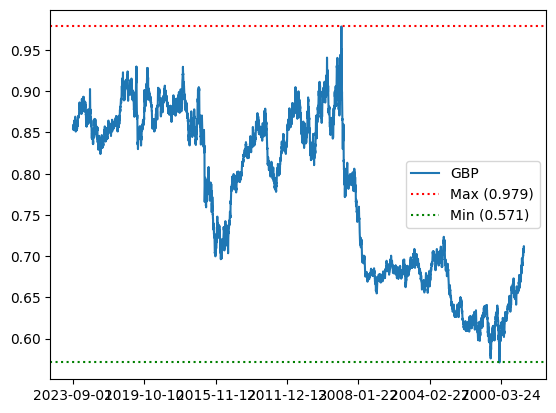

In [111]:
# Plot the DataFrame
ax = df_gbp_euro.plot()

# Calculate maximum and minimum values and their indices
max_val = df_gbp_euro['GBP'].max()
max_idx = df_gbp_euro['GBP'].idxmax()
min_val = df_gbp_euro['GBP'].min()
min_idx = df_gbp_euro['GBP'].idxmin()

# Print the results
print(f"Max val of {max_val:.3f} at date {max_idx}")
print(f"Min val of {min_val:.3f} at date {min_idx}")

# Add dotted lines for maximum and minimum values
ax.axhline(max_val, color='red', linestyle='dotted', label=f'Max ({max_val:.3f})')
ax.axhline(min_val, color='green', linestyle='dotted', label=f'Min ({min_val:.3f})')

# Show the legend
ax.legend()

# Show the plot
plt.show()
